LEVEL 3

In [47]:
import pandas as pd

In [48]:
df=pd.read_csv("Dataset1 .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


                                                Task 1: Restaurant Reviews

In [49]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [60]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [95]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

def preprocess_text(text):
    tokens=word_tokenize(text.lower())
    tokens=[word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rglra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rglra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rglra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [97]:
df['processed_reviews']=df['Rating text'].dropna().apply(preprocess_text)

In [98]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()
all_tokens=[token for sublist in df['processed_reviews'] for token in sublist]
token_counts=Counter(all_tokens)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rglra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [99]:
positive_words=[word for word,count in token_counts.items() if sia.polarity_scores(word)['compound']>0.5]
negative_words=[word for word,count in token_counts.items() if sia.polarity_scores(word)['compound']<-0.5]

In [100]:
most_common_positive=Counter(positive_words).most_common(10)
most_common_negative=Counter(negative_words).most_common(10)
print("Most Common Positive Words:",most_common_positive)
print("Most Common Negative Words:",most_common_negative)

Most Common Positive Words: [('excellent', 1)]
Most Common Negative Words: []


In [101]:
df['rating length']=df['Rating text'].dropna().apply(lambda x: len(x.split()))
average_rating_length=df['rating length'].mean()
print("Average Rating Length:",average_rating_length)

Average Rating Length: 1.3378703800649148


In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df=df.dropna(subset=['Rating text','rating length'])

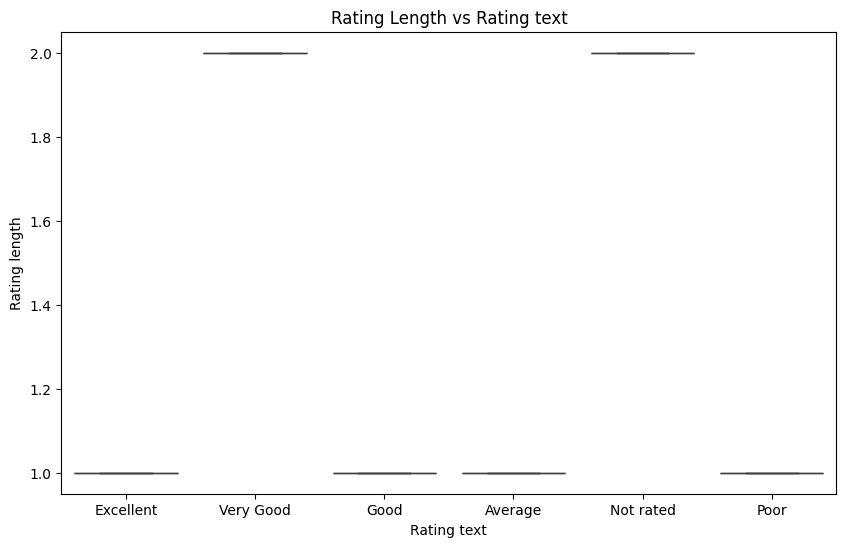

In [104]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Rating text',y='rating length',data=df)
plt.title('Rating Length vs Rating text')
plt.xlabel('Rating text')
plt.ylabel('Rating length')
plt.show()

                                                   Task 2: Votes Analysis

In [105]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'processed_reviews', 'rating length'],
      dtype='object')


In [106]:
highest_votes=df.loc[df['Votes'].idxmax()]
lowest_votes=df.loc[df['Votes'].idxmin()]

In [107]:
print("Restaurant with the highest number of votes:",highest_votes)

Restaurant with the highest number of votes: Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                  

In [108]:
print("Restaurant with the lowest number of votes:",lowest_votes)

Restaurant with the lowest number of votes: Restaurant ID                                                     6710645
Restaurant Name                                          Cantinho da Gula
Country Code                                                           30
City                                                           S��o Paulo
Address                 Rua Pedroso Alvarenga, 522, Itaim Bibi, S��o P...
Locality                                                       Itaim Bibi
Locality Verbose                                   Itaim Bibi, S��o Paulo
Longitude                                                      -46.675667
Latitude                                                          -23.581
Cuisines                                                        Brazilian
Average Cost for two                                                   55
Currency                                               Brazilian Real(R$)
Has Table booking                                                   

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

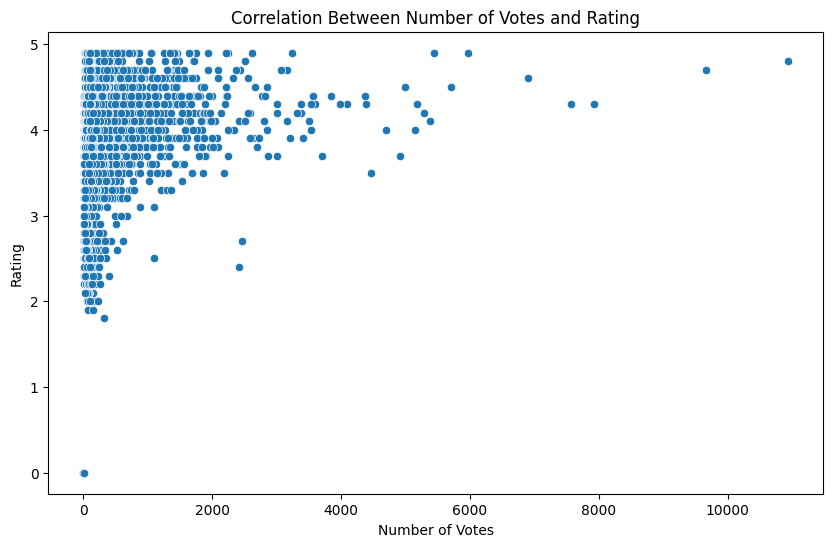

In [110]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Votes',y='Aggregate rating',data=df)
plt.title('Correlation Between Number of Votes and Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()

In [112]:
correlation=df['Votes'].corr(df['Aggregate rating'])
print("correlation coefficient between number of votes and rating:",correlation)

correlation coefficient between number of votes and rating: 0.31369058419541135


                                 Task 3: Price Range vs. Online Delivery and Table Booking

In [139]:
price_column='Price range'
online_delivery_column ='Has Online delivery'
table_booking_column ='Has Table booking'

df[online_delivery_column]=df[online_delivery_column].apply(lambda x: 1 if str(x).lower()=='yes' else 0)
df[table_booking_column]=df[table_booking_column].apply(lambda x: 1 if str(x).lower()=='yes' else 0)

In [145]:
price_analysis=df.groupby(price_column)[[online_delivery_column,table_booking_column]].mean()
print("Analysis of Online Delivery and Table Booking by Price Range \n")
print(price_analysis)

Analysis of Online Delivery and Table Booking by Price Range 

             Has Online delivery  Has Table booking
Price range                                        
1                            0.0                0.0
2                            0.0                0.0
3                            0.0                0.0
4                            0.0                0.0


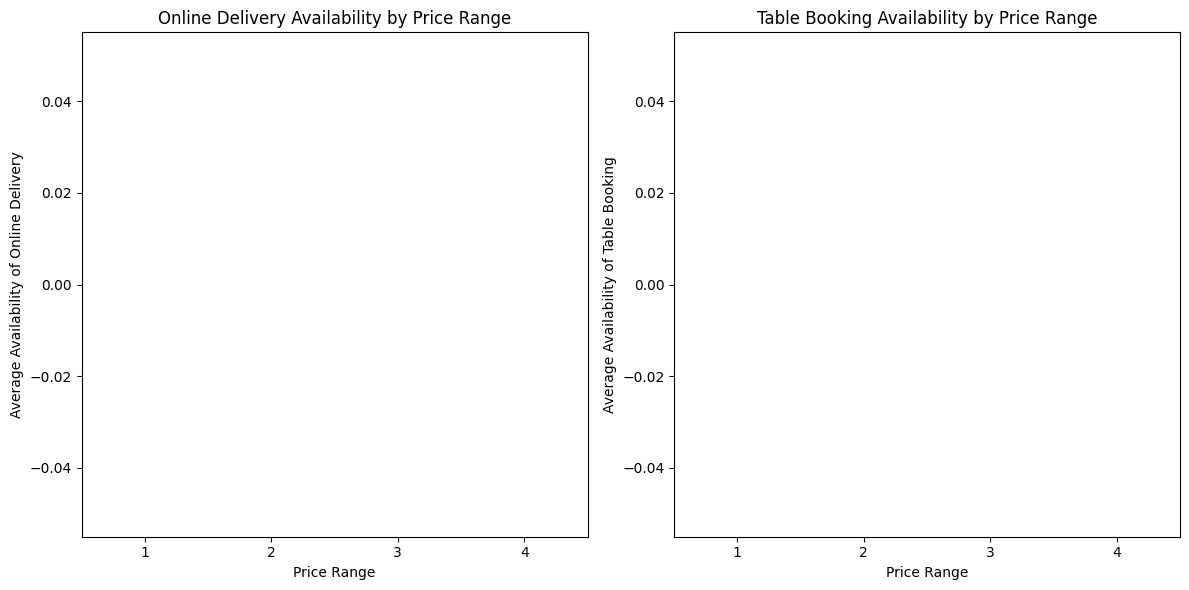

Correlation coefficient between price range and online delivery: nan
Correlation coefficient between price range and table booking: nan


C:\Users\rglra\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\rglra\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the relationship between price range and availability of services
plt.figure(figsize=(12, 6))

# Online Delivery
plt.subplot(1, 2, 1)
sns.barplot(x=price_analysis.index, y=price_analysis[online_delivery_column])
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Availability of Online Delivery')

# Table Booking
plt.subplot(1, 2, 2)
sns.barplot(x=price_analysis.index, y=price_analysis[table_booking_column])
plt.title('Table Booking Availability by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Availability of Table Booking')

plt.tight_layout()
plt.show()

# Calculate correlation coefficients
corr_online_delivery = df[price_column].corr(df[online_delivery_column])
corr_table_booking = df[price_column].corr(df[table_booking_column])

print("Correlation coefficient between price range and online delivery:", corr_online_delivery)
print("Correlation coefficient between price range and table booking:", corr_table_booking)
